In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

import seaborn as sns
sns.set()

In [2]:
rawData = pd.read_csv('Used Cars Price.csv')
rawData

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4
...,...,...,...,...,...,...,...,...,...
4340,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,S 350
4341,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,535
4342,BMW,8000.0,sedan,194,2.0,Petrol,yes,1985,520
4343,Toyota,14200.0,sedan,31,NaN,Petrol,yes,2014,Corolla


In [3]:
rawData.describe(include = 'all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


# pre Proccecing

شروع پری پروسسینگ برای حذف دیتاهای بدرد نخور


روی همه دیتاهایی که با عدد هستن باید چکینگ انجام بشه

بعنوان مثال در خط زیر کل ستون مدل رو حذف میکنیم چون تعداد مدل های موجود با توجه به سطر یونیک خیلی زیاده


axix = 1   ====>ستون


axix = 0   ====> سطر

In [4]:
data = rawData.drop( ['Model'] , axis=1)
data

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011
...,...,...,...,...,...,...,...,...
4340,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014
4341,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999
4342,BMW,8000.0,sedan,194,2.0,Petrol,yes,1985
4343,Toyota,14200.0,sedan,31,NaN,Petrol,yes,2014


In [5]:
data.describe()

,Price,Mileage,EngineV,Year
count,4173.000000,4345.000000,4195.000000,4345.000000
mean,19418.746935,161.237284,2.790734,2006.550058
std,25584.242620,105.705797,5.066437,6.719097
min,600.000000,0.000000,0.600000,1969.000000
25%,6999.000000,86.000000,1.800000,2003.000000
50%,11500.000000,155.000000,2.200000,2008.000000
75%,21700.000000,230.000000,3.000000,2012.000000
max,300000.000000,980.000000,99.990000,2016.000000


باتوجه به دستور پایین متوجه تعداد نال دیتاها در ستون های دیگه میشیم که اونارو هم حذف کنیم

In [6]:
data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

removin mission values with .dropna

In [7]:
dataWithNoMissionValue = data.dropna(axis=0)
dataWithNoMissionValue.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


 در جدول بالا میبینیم که اختلاف بیشترین قیمت با میانگین قیمتامون خیلی زیاده و باید یه سری دیتا که باعث بوجود اومدن اوت لایر شدن رو از بین ببریم



# Dealing with outliers

با این کد یک نمودار توضیع میکشیم

<AxesSubplot:xlabel='Price', ylabel='Density'>

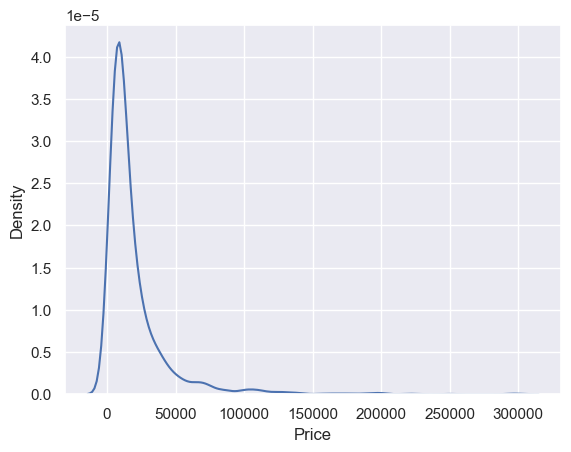

In [8]:
sns.kdeplot(dataWithNoMissionValue['Price'])

در خط اول ۹۵ درصد از داده های اول رو انتخاب میکنیم و میریزیم توی کیو

در خط دوم دیتاها رو بر اساس قیمت با ۹۵ درصد از دیتاهای اولی انتخاب شده مقایسه میکنه و اونایی که قیمتی بیشتر از ۹۶ درصد از داده ها دارن رو حذف میکنه

به این صورت توزیع فراوانیمون بهتر میشه و میانگن و مکسمون نزدیکتر میشن

<AxesSubplot:xlabel='Price', ylabel='Density'>

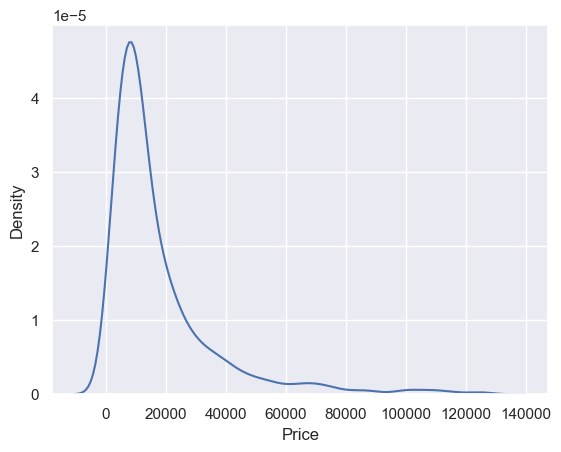

In [9]:
q = dataWithNoMissionValue['Price'].quantile(0.99)
dataWithNormalDistOfMean = dataWithNoMissionValue[dataWithNoMissionValue['Price'] < q]
sns.kdeplot(dataWithNormalDistOfMean['Price'])

In [10]:
dataWithNormalDistOfMean.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3984,3984.000000,3984,3984.000000,3984.000000,3984,3984,3984.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1528,NaN,NaN,1853,3613,NaN
mean,NaN,17837.117460,NaN,165.116466,2.743770,NaN,NaN,2006.292922
std,NaN,18976.268315,NaN,102.766126,4.956057,NaN,NaN,6.672745
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6980.000000,NaN,93.000000,1.800000,NaN,NaN,2002.750000
50%,NaN,11400.000000,NaN,160.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21000.000000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


<AxesSubplot:xlabel='Mileage', ylabel='Density'>

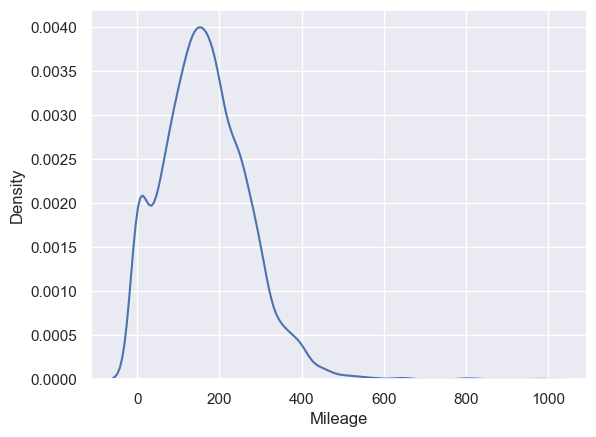

In [11]:
sns.kdeplot(dataWithNormalDistOfMean['Mileage'])

<AxesSubplot:xlabel='Mileage', ylabel='Density'>

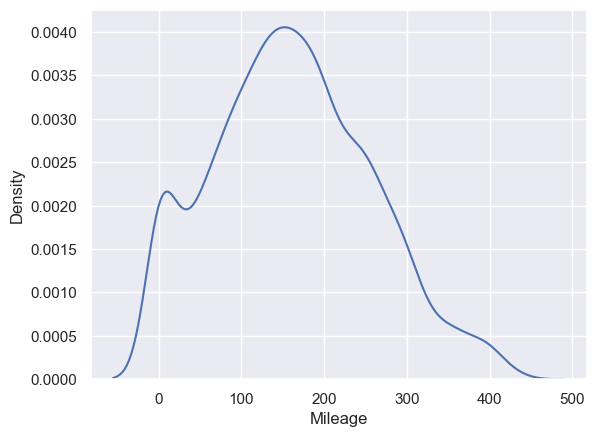

In [12]:
qM = dataWithNormalDistOfMean['Mileage'].quantile(0.99)
dataWithNormalDistofMileage = dataWithNormalDistOfMean[dataWithNormalDistOfMean['Mileage'] < qM]
sns.kdeplot(dataWithNormalDistofMileage['Mileage'])

In [13]:
dataWithNormalDistofMileage.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3944,3944.000000,3944,3944.000000,3944.000000,3944,3944,3944.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,867,NaN,1511,NaN,NaN,1825,3576,NaN
mean,NaN,17933.880822,NaN,161.484026,2.747612,NaN,NaN,2006.389959
std,NaN,19008.212025,NaN,96.027108,4.980406,NaN,NaN,6.595986
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,7000.000000,NaN,92.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21376.250000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


<AxesSubplot:xlabel='EngineV', ylabel='Density'>

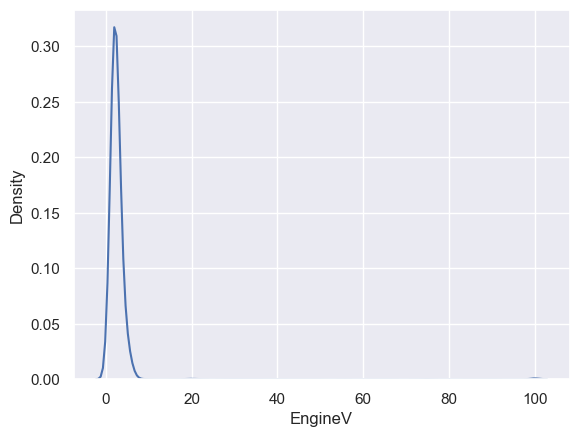

In [14]:
sns.kdeplot(dataWithNormalDistofMileage['EngineV'])

<AxesSubplot:xlabel='EngineV', ylabel='Density'>

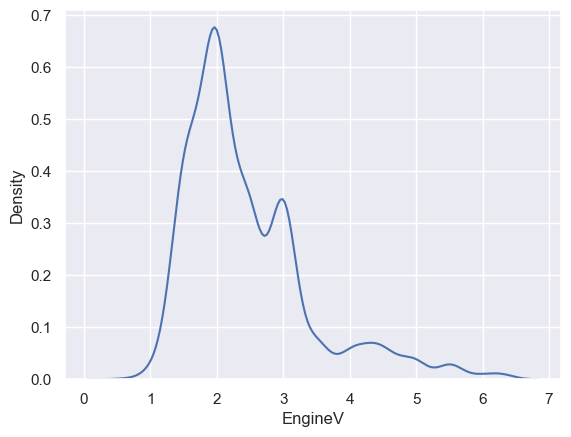

In [15]:
#qEV = dataWithNormalDistofMileage['EngineV'].quantile(0.99)
#ماشین بالای ۷.۵ لیتر نداریم و هرچی بالاتر از ۷.۵ هست داده اشتباهه و جزو میسیون ولیو محسوب میشه
dataWithNormalDistofEV = dataWithNormalDistofMileage[dataWithNormalDistofMileage['EngineV'] < 6.5]
sns.kdeplot(dataWithNormalDistofEV['EngineV'])

In [16]:
dataWithNormalDistofEV.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3921,3921.000000,3921,3921.000000,3921.000000,3921,3921,3921.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,862,NaN,1499,NaN,NaN,1818,3559,NaN
mean,NaN,17988.421311,NaN,161.279776,2.443497,NaN,NaN,2006.406019
std,NaN,19041.658686,NaN,96.068269,0.946198,NaN,NaN,6.595871
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,7000.000000,NaN,92.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21500.000000,NaN,229.000000,3.000000,NaN,NaN,2012.000000


<AxesSubplot:xlabel='Year', ylabel='Density'>

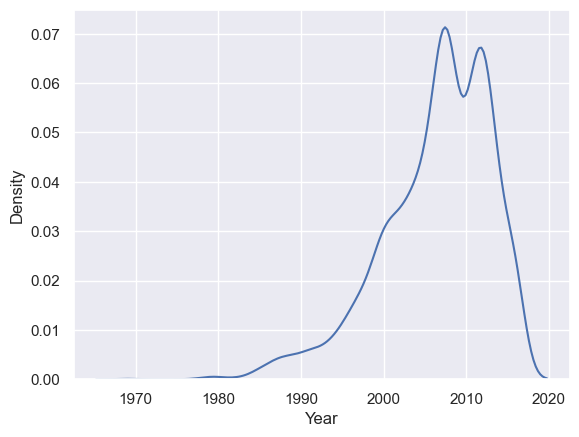

In [17]:
sns.kdeplot(dataWithNormalDistofEV['Year'])

<AxesSubplot:xlabel='Year', ylabel='Density'>

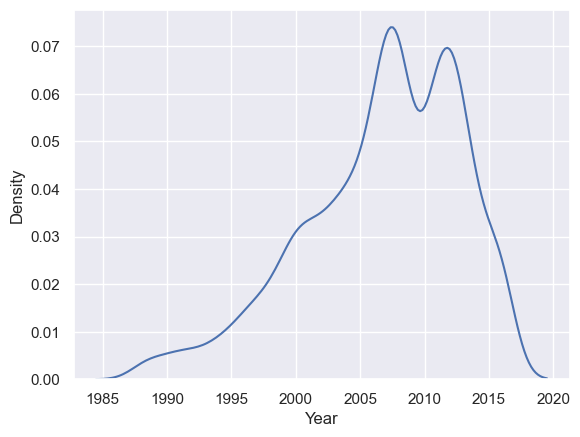

In [18]:
qY = dataWithNormalDistofEV['Year'].quantile(0.01)
dataWithNormalDistofY = dataWithNormalDistofEV[dataWithNormalDistofEV['Year'] > qY]
sns.kdeplot(dataWithNormalDistofY['Year'])

In [19]:
dataWithNormalDistofY.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3867,3867.000000,3867,3867.000000,3867.000000,3867,3867,3867.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,848,NaN,1467,NaN,NaN,1807,3505,NaN
mean,NaN,18194.455679,NaN,160.542539,2.450440,NaN,NaN,2006.709853
std,NaN,19085.855165,NaN,95.633291,0.949366,NaN,NaN,6.103870
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000
25%,NaN,7200.000000,NaN,91.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11700.000000,NaN,157.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,225.000000,3.000000,NaN,NaN,2012.000000


In [20]:
dataWithNormalDistofY

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011
...,...,...,...,...,...,...,...,...
4338,Volkswagen,11500.0,van,163,2.5,Diesel,yes,2008
4339,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014
4340,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014
4341,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999


در جدول بالا میبینیم که اندیس ها طبق اندیس های قبل از پریپروسسینگ مونده و اندیس های حذف شده جاشونو به دیتاهای بعدشون ندادن و اندیس هایی در جدول وجود داده که جاشون خالیه

برای اینکه اندیس گذاری از ابتدا انجام بشه و همه دیتاها بصورت یکنواخت اندیس دهی بشن و جایی خلی نباشه از متد زیر استفاده میکنیم

In [21]:
cleanedData = dataWithNormalDistofY.reset_index()
cleanedData

,index,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991
1,1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999
2,2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003
3,3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007
4,4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011
...,...,...,...,...,...,...,...,...,...
3862,4338,Volkswagen,11500.0,van,163,2.5,Diesel,yes,2008
3863,4339,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014
3864,4340,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014
3865,4341,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999


In [22]:
cleanedData = dataWithNormalDistofY.reset_index(drop=True)
cleanedData

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011
...,...,...,...,...,...,...,...,...
3862,Volkswagen,11500.0,van,163,2.5,Diesel,yes,2008
3863,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014
3864,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014
3865,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999


# ٰبررسی مفروضات رگرسیون

1- linearity

Text(0.5, 1.0, 'EngineV and Price')

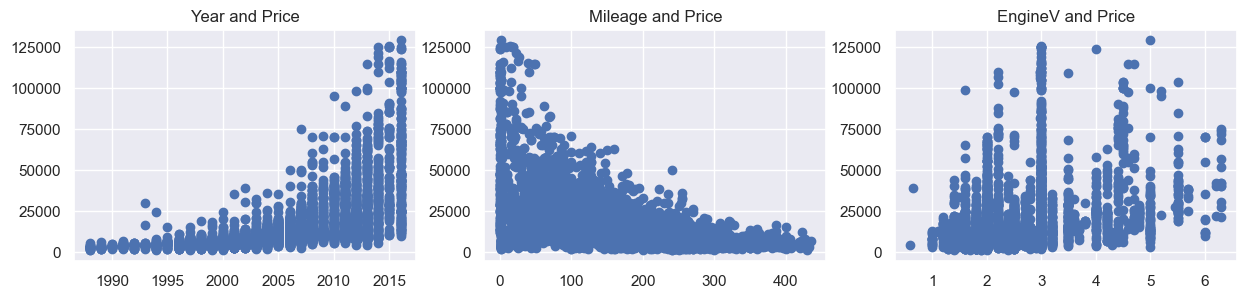

In [23]:
fig , (ax1 ,ax2 ,ax3) = plt.subplots(1,3 , sharey = False , figsize=(15,3))

ax1.scatter(cleanedData['Year'] , cleanedData['Price'])
ax1.set_title('Year and Price')

ax2.scatter(cleanedData['Mileage'] , cleanedData['Price'])
ax2.set_title('Mileage and Price')

ax3.scatter(cleanedData['EngineV'] , cleanedData['Price'])
ax3.set_title('EngineV and Price')

چون رابطه خطی نمیتونه وجود داشته باشه پس با تکنیک لاگ گرفتن از قیمت میتونیم اونو خطی کنیم

In [24]:
logedPrice = np.log(cleanedData['Price'])
cleanedData['Loged Price'] = logedPrice
cleanedData

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Loged Price
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,8.342840
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,8.974618
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,9.495519
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,10.043249
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,9.814656
...,...,...,...,...,...,...,...,...,...
3862,Volkswagen,11500.0,van,163,2.5,Diesel,yes,2008,9.350102
3863,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014,9.792556
3864,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,11.736069
3865,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,8.779557


Text(0.5, 1.0, 'EngineV and Loged Price')

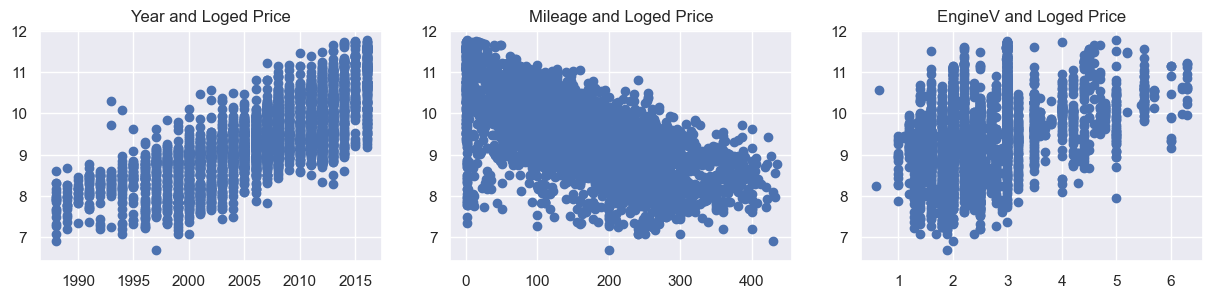

In [25]:
fig , (ax1 ,ax2 ,ax3) = plt.subplots(1,3 , sharey = False , figsize=(15,3))

ax1.scatter(cleanedData['Year'] , cleanedData['Loged Price'])
ax1.set_title('Year and Loged Price')

ax2.scatter(cleanedData['Mileage'] , cleanedData['Loged Price'])
ax2.set_title('Mileage and Loged Price')

ax3.scatter(cleanedData['EngineV'] , cleanedData['Loged Price'])
ax3.set_title('EngineV and Loged Price')

In [26]:
cleanedData2 = cleanedData.drop(['Price'] , axis=1)
cleanedData2

,Brand,Body,Mileage,EngineV,Engine Type,Registration,Year,Loged Price
0,BMW,sedan,277,2.0,Petrol,yes,1991,8.342840
1,Mercedes-Benz,van,427,2.9,Diesel,yes,1999,8.974618
2,Mercedes-Benz,sedan,358,5.0,Gas,yes,2003,9.495519
3,Audi,crossover,240,4.2,Petrol,yes,2007,10.043249
4,Toyota,crossover,120,2.0,Petrol,yes,2011,9.814656
...,...,...,...,...,...,...,...,...
3862,Volkswagen,van,163,2.5,Diesel,yes,2008,9.350102
3863,Toyota,sedan,35,1.6,Petrol,yes,2014,9.792556
3864,Mercedes-Benz,sedan,9,3.0,Diesel,yes,2014,11.736069
3865,BMW,sedan,1,3.5,Petrol,yes,1999,8.779557


# 2-no endogeneity

We will talk about this issue later.

tests to find endongeneity


KeyWords: Hausman test, IV, 2SLS, GMM, ...

See the following link:

A good example: https://python.quantecon.org/ols.html#Endogeneity

How we can intrpret our results: https://stats.stackexchange.com/questions/210696/how-to-interpret-hausman-test-results

Documentations of linearmodels library: https://bashtage.github.io/linearmodels/doc/iv/introduction.html

#  3- Normality and Homoscedasticity

Just check the above graphs. Since intercept has been included in our model, so the mean of error is ZERO.

# 4- No Autocorrelation

We should not be worry, because our data is not a time series data or a panel data.

# 5- No Multicollinearity

VIF (Variance Inflation Factor) and its application in detecting Multicollinearity

If VIF > 10, then multicollinearity is high and we should remove that item.

In [27]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

variables = cleanedData2[['Mileage' , 'Year' ,'EngineV']]

vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables.values , i) for i in range(variables.shape[1]) ]
vif['Features'] = variables.columns
vif

,VIF,Features
0,3.791584,Mileage
1,10.354854,Year
2,7.662068,EngineV


In [28]:
cleanedData3 = cleanedData2.drop( ['Year'] , axis=1 )
cleanedData3

,Brand,Body,Mileage,EngineV,Engine Type,Registration,Loged Price
0,BMW,sedan,277,2.0,Petrol,yes,8.342840
1,Mercedes-Benz,van,427,2.9,Diesel,yes,8.974618
2,Mercedes-Benz,sedan,358,5.0,Gas,yes,9.495519
3,Audi,crossover,240,4.2,Petrol,yes,10.043249
4,Toyota,crossover,120,2.0,Petrol,yes,9.814656
...,...,...,...,...,...,...,...
3862,Volkswagen,van,163,2.5,Diesel,yes,9.350102
3863,Toyota,sedan,35,1.6,Petrol,yes,9.792556
3864,Mercedes-Benz,sedan,9,3.0,Diesel,yes,11.736069
3865,BMW,sedan,1,3.5,Petrol,yes,8.779557


# Step 3: Create dummy Variables

In session 14 we create a dummy variable by using map

data = raw_data.copy()

data['Attendance'] = data['Attendance'].map({'Yes': 1, 'No': 0})

Now in what follows, we will create dummies by a simple code of Pandas
Note that if we have N categories for a feature, we have to create N-1 dummies.

اگر ما به تعداد متغییرامون دامی بسازیم بعدا با مشکل مولتی کولینیریتی مواجه میشیم پس باید ان - 1 تا دامی بسازیم

In [33]:
dataWithDummies = pd.get_dummies(cleanedData3 , drop_first=True)
dataWithDummies

,Mileage,EngineV,Loged Price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.0,8.342840,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,427,2.9,8.974618,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,358,5.0,9.495519,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,240,4.2,10.043249,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,120,2.0,9.814656,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3862,163,2.5,9.350102,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
3863,35,1.6,9.792556,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1
3864,9,3.0,11.736069,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1
3865,1,3.5,8.779557,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1


In [35]:
dataWithDummies.columns

Index(['Mileage', 'EngineV', 'Loged Price', 'Brand_BMW', 'Brand_Mercedes-Benz',
       'Brand_Mitsubishi', 'Brand_Renault', 'Brand_Toyota', 'Brand_Volkswagen',
       'Body_hatch', 'Body_other', 'Body_sedan', 'Body_vagon', 'Body_van',
       'Engine Type_Gas', 'Engine Type_Other', 'Engine Type_Petrol',
       'Registration_yes'],
      dtype='object')

In [36]:
newColumnsOrder = ['Loged Price', 'EngineV','Mileage' , 'Brand_BMW', 'Brand_Mercedes-Benz',
       'Brand_Mitsubishi', 'Brand_Renault', 'Brand_Toyota', 'Brand_Volkswagen',
       'Body_hatch', 'Body_other', 'Body_sedan', 'Body_vagon', 'Body_van',
       'Engine Type_Gas', 'Engine Type_Other', 'Engine Type_Petrol',
       'Registration_yes']

preProccecedData = dataWithDummies[newColumnsOrder]
preProccecedData

,Loged Price,EngineV,Mileage,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.342840,2.0,277,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,8.974618,2.9,427,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,9.495519,5.0,358,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,10.043249,4.2,240,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,9.814656,2.0,120,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3862,9.350102,2.5,163,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
3863,9.792556,1.6,35,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1
3864,11.736069,3.0,9,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1
3865,8.779557,3.5,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1


# Step 4: Creating the Linear Regression Model


هدف از تولید مدل اینه که قیممت ها رو بتونیم پیش بینی کنیم

برای این کار اول تارگت رو میزاریم قیمت و ورودی رو همه موارد بجز قیمت میزاریم


In [37]:
target = preProccecedData['Loged Price']
inputs = preProccecedData.drop(['Loged Price'] , axis=1)

ورودی هامون رو یکسان سازی میکنیم

In [40]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(inputs)
scaledInputs = scaler.transform(inputs)

داده های واقعیمون رو به دو دسته تست و ترین تقسیم میکنیم تا مدلمون رو با داده های ترین اول رسم کنیم

In [59]:
from sklearn.model_selection import train_test_split
xTrain , xTest , yTrain , yTest = train_test_split(scaledInputs , target , test_size = 0.2 , random_state = 42)

In [48]:
reg = LinearRegression()
reg.fit(xTrain , yTrain)

LinearRegression()

In [60]:
yTrainPredict = reg.predict(xTrain)

پلات زیر رو رسم میکنیم برای مقایسه داده های واقعی موجود در دیتاست با دادهایی که پریدیکت یا پیشبینی کردیم

که بهترین حالت برای این نمودار اینه که داده ها روی نقاط نظیر در سطر و ستون باشن که به این معنیه که پیشبینی مدلمون با دیتاهای دیتاستمون یکیه

Text(0, 0.5, 'predicted Y')

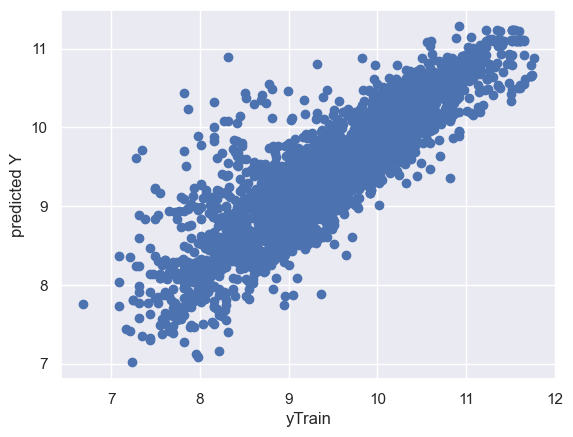

In [58]:
plt.scatter(yTrain,yTrainPredict)

plt.xlabel('yTrain')
plt.ylabel('predicted Y')

In [61]:
reg.score(xTrain,yTrain)

0.7546487921881216

In [63]:
reg.intercept_

9.421003614148074

In [64]:
reg.coef_

array([ 0.21526817, -0.46815598,  0.01105151,  0.00569157, -0.14247174,
       -0.18769337, -0.06529696, -0.09898873, -0.13980763, -0.09384461,
       -0.17892753, -0.11457574, -0.15668036, -0.11685263, -0.02572253,
       -0.15106183,  0.31442123])

هرچه وزن بیشتر باشد تاثیر آن در تارگت بیشتر است

اگر منفی باشد یعنی تاثیری منفی دارد(در اینجا باعث کاهش قیمت میشود)

و اگر مثبت باشد تاثیر ان مثبت است

In [68]:
summaryTable = pd.DataFrame()
summaryTable['Feature'] = inputs.columns
summaryTable['Weight'] = reg.coef_
summaryTable

,Feature,Weight
0,EngineV,0.215268
1,Mileage,-0.468156
2,Brand_BMW,0.011052
3,Brand_Mercedes-Benz,0.005692
4,Brand_Mitsubishi,-0.142472
5,Brand_Renault,-0.187693
6,Brand_Toyota,-0.065297
7,Brand_Volkswagen,-0.098989
8,Body_hatch,-0.139808
9,Body_other,-0.093845


# Step 5: Testing our Model

In [69]:
yTestPredict = reg.predict(xTest)

(5.0, 15.0)

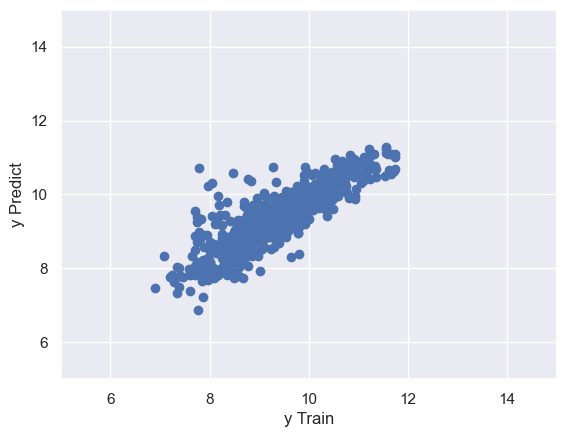

In [73]:
plt.scatter(yTest , yTestPredict)

plt.xlabel('y Train')
plt.ylabel('y Predict')

plt.xlim(5,15)
plt.ylim(5,15)

In [74]:
summaryTable2 = pd.DataFrame()
summaryTable2['Predicted'] = np.exp(yTestPredict)
summaryTable2['Target'] = np.exp(yTest)
summaryTable2

,Predicted,Target
0,40419.308971,4200.0
1,7956.895960,NaN
2,5757.284408,NaN
3,9765.810605,NaN
4,7027.363814,NaN
...,...,...
769,4699.586013,NaN
770,9123.067372,NaN
771,6267.803094,NaN
772,20906.128600,NaN


پانداس با استفاده از ایندکس ها میاد مقادیر رو محاسبه و وارد میکنه که از کد زیر میفهمیم ایندکس های اولیه خراب شده و به ترتیب نیست پس یکبار ریست ایندکس میکنیم و دوباره عمل گرفتن تابع نمایی که برای درست کردن لگاریتمی که اول گرفتیم بوده رو انجام میدیم و توی دیتافریممون ذخیرش میکنیم 

In [77]:
yTest.head()

2174    9.966462
1420    9.093807
2478    8.086410
1584    9.392662
952     8.594154
Name: Loged Price, dtype: float64

In [76]:
targetNewIndexing = yTest.reset_index(drop=True)

summaryTable2 = pd.DataFrame()
summaryTable2['Predicted'] = np.exp(yTestPredict)
summaryTable2['Target'] = np.exp(targetNewIndexing)
summaryTable2

,Predicted,Target
0,40419.308971,21300.0
1,7956.895960,8900.0
2,5757.284408,3250.0
3,9765.810605,12000.0
4,7027.363814,5400.0
...,...,...
769,4699.586013,4200.0
770,9123.067372,8800.0
771,6267.803094,4850.0
772,20906.128600,27000.0


In [78]:
targetNewIndexing.head()

0    9.966462
1    9.093807
2    8.086410
3    9.392662
4    8.594154
Name: Loged Price, dtype: float64

# Percent Error = $\Big|(Target-Prediction)\times \frac{100}{Target}\Big| = \frac{Residual}{Target}\times 100$

See the following link for more details:

https://www.mathsisfun.com/data/percentage-difference-vs-error.html

In [82]:
summaryTable2['Residual'] = summaryTable2['Target'] - summaryTable2['Predicted']
summaryTable2['Percent Error'] = np.absolute(summaryTable2['Residual'] / summaryTable2['Target'] * 100) 
summaryTable2

,Predicted,Target,Residual,Percent Error
0,40419.308971,21300.0,-19119.308971,89.762014
1,7956.895960,8900.0,943.104040,10.596675
2,5757.284408,3250.0,-2507.284408,77.147213
3,9765.810605,12000.0,2234.189395,18.618245
4,7027.363814,5400.0,-1627.363814,30.136367
...,...,...,...,...
769,4699.586013,4200.0,-499.586013,11.894905
770,9123.067372,8800.0,-323.067372,3.671220
771,6267.803094,4850.0,-1417.803094,29.233053
772,20906.128600,27000.0,6093.871400,22.569894


In [83]:
summaryTable2.describe()

,Predicted,Target,Residual,Percent Error
count,774.000000,774.000000,774.000000,774.000000
mean,16113.011638,17799.988992,1686.977355,42.085282
std,13326.229797,19723.434542,11192.614496,96.169928
min,967.030415,999.000000,-42859.020603,0.020246
25%,7467.591694,6700.000000,-2246.354353,11.024941
50%,11914.358989,11050.000000,-38.697776,24.086183
75%,20249.505640,20475.000000,3004.524837,42.381716
max,79026.348020,125000.000000,81051.158885,1785.792525


In [91]:
pd.options.display.max_rows = 999
summaryTable2.sort_values( by=['Percent Error'] , inplace=True )
summaryTable2

,Predicted,Target,Residual,Percent Error
387,13602.753468,13600.00,-2.753468,0.020246
74,28889.063628,28900.00,10.936372,0.037842
314,35530.207664,35500.00,-30.207664,0.085092
336,11313.265936,11300.00,-13.265936,0.117398
425,2995.676139,3000.00,4.323861,0.144129
262,52180.113403,52055.25,-124.863403,0.239867
674,3107.506596,3100.00,-7.506596,0.242148
648,9675.565748,9700.00,24.434252,0.251900
79,21407.589940,21335.00,-72.589940,0.340239
313,9865.724471,9900.00,34.275529,0.346217


In [94]:
np.round(summaryTable2,3)

,Predicted,Target,Residual,Percent Error
387,13602.753,13600.00,-2.753,0.020
74,28889.064,28900.00,10.936,0.038
314,35530.208,35500.00,-30.208,0.085
336,11313.266,11300.00,-13.266,0.117
425,2995.676,3000.00,4.324,0.144
262,52180.113,52055.25,-124.863,0.240
674,3107.507,3100.00,-7.507,0.242
648,9675.566,9700.00,24.434,0.252
79,21407.590,21335.00,-72.590,0.340
313,9865.724,9900.00,34.276,0.346


You can change the values of Target to int:

df_performance['Target'] = df_performance['Target'].astype(int)

You can also use of this code to get a rounded two decimal float number:

pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [95]:
np.round(summaryTable ,3)

,Feature,Weight
0,EngineV,0.215
1,Mileage,-0.468
2,Brand_BMW,0.011
3,Brand_Mercedes-Benz,0.006
4,Brand_Mitsubishi,-0.142
5,Brand_Renault,-0.188
6,Brand_Toyota,-0.065
7,Brand_Volkswagen,-0.099
8,Body_hatch,-0.140
9,Body_other,-0.094


# ## Our Model

$\hat{y} = -0.47\times Mileage + 0.22\times EngineV + 0.01\times Brand\_BMW + \ldots + 0.31\times Registration\_yes$

### Time to see a real world example of such a regression model out there
https://karnameh.com/car-price/used-car